In [ ]:
from tensorflow.keras.datasets import mnist #Библиотека с базой Mnist
from tensorflow.keras.models import Sequential # Подлючаем класс создания модели Sequential
from tensorflow.keras.layers import Dense # Подключаем класс Dense - полносвязный слой
from tensorflow.keras.optimizers import Adam # Подключаем оптимизатор Adam
from tensorflow.keras import utils #Утилиты для to_categorical
from tensorflow.keras.preprocessing import image #Для отрисовки изображения
import numpy as np # Подключаем библиотеку numpy
import pylab # Модуль для построения графиков
from mpl_toolkits.mplot3d import Axes3D # Модуль для трехмерной графики
from google.colab import files #Для загрузки своей картинки
import matplotlib.pyplot as plt #Отрисовка изображений
from PIL import Image #Отрисовка изображений
#Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline 

In [ ]:
(xtrainOrg, ytrainOrg), (xtestOrg, ytestOrg)= mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)
3



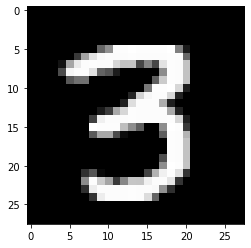

In [ ]:
n=149
print(xtrainOrg.shape,ytrainOrg[n],sep='\n',end='\n\n')

plt.imshow(Image.fromarray(xtrainOrg[n]).convert('RGB'))
plt.show()


In [ ]:
xTrain=xtrainOrg.reshape(60000,784)
xTest=xtestOrg.reshape(10000,784)
print(xtrainOrg.shape,xTrain.shape,xtestOrg.shape,xTest.shape)

(60000, 28, 28) (60000, 784) (10000, 28, 28) (10000, 784)


In [ ]:
xTrain = xTrain.astype('float32') 
xTrain = xTrain / 255 
xTest = xTest.astype('float32')
xTest = xTest / 255
print(xTrain.dtype,xTest.dtype)

float32 float32


In [ ]:
yTrain = utils.to_categorical(ytrainOrg, 10)
yTest = utils.to_categorical(ytestOrg, 10)
print(ytrainOrg.shape,yTrain.shape)
print(ytrainOrg[2],yTrain[2])

(60000,) (60000, 10)
4 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
mymodel=Sequential()
mymodel.add(Dense(800, input_dim=784, activation="relu"))
mymodel.add(Dense(400, activation="relu"))
mymodel.add(Dense(10, activation="softmax"))

In [ ]:
mymodel.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
print(mymodel.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               628000    
_________________________________________________________________
dense_1 (Dense)              (None, 400)               320400    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
mymodel.fit(xTrain, yTrain, batch_size=128, epochs=15, verbose=1)

Epoch 1/15
469/469 [==============================] - 9s 17ms/step - loss: 0.3886 - accuracy: 0.8829
Epoch 2/15
469/469 [==============================] - 8s 17ms/step - loss: 0.0735 - accuracy: 0.9768
Epoch 3/15
469/469 [==============================] - 8s 17ms/step - loss: 0.0446 - accuracy: 0.9864
Epoch 4/15
469/469 [==============================] - 8s 17ms/step - loss: 0.0311 - accuracy: 0.9903
Epoch 5/15
469/469 [==============================] - 8s 17ms/step - loss: 0.0232 - accuracy: 0.9926
Epoch 6/15
469/469 [==============================] - 8s 17ms/step - loss: 0.0192 - accuracy: 0.9937
Epoch 7/15
469/469 [==============================] - 8s 17ms/step - loss: 0.0179 - accuracy: 0.9940
Epoch 8/15
469/469 [==============================] - 8s 17ms/step - loss: 0.0170 - accuracy: 0.9945
Epoch 9/15
469/469 [==============================] - 8s 17ms/step - loss: 0.0128 - accuracy: 0.9960
Epoch 10/15
469/469 [==============================] - 8s 17ms/step - loss: 0.0124 - accura

In [ ]:
mymodel.save_weights('model.h5')
mymodel.load_weights('model.h5')

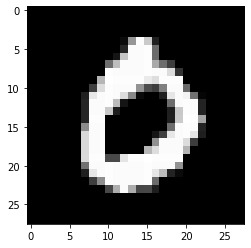

In [ ]:
nDigit=3
plt.imshow(Image.fromarray(xtestOrg[nDigit]).convert('RGB'))
plt.show()

In [ ]:
x = xTest[nDigit]
print(x.shape)

(784,)


In [ ]:
x=np.expand_dims(x,axis=0)
print(x.shape)

(1, 784)


In [ ]:
predict1=mymodel.predict(x)
print(predict1)

[[1.00000000e+00 1.08476145e-11 1.35013041e-08 1.69054798e-12
  8.85176238e-11 3.46843349e-13 2.59684647e-08 8.81481416e-11
  1.65804802e-13 1.28976807e-09]]


In [ ]:
sum(predict1[0])

1.0000000588063678

In [ ]:
predDig = np.argmax(predict1) 
print(predDig)
print(ytestOrg[nDigit])

0
0


In [ ]:
ntest=10000 #число тестируемых цифр
lotx = xTest[range(ntest)]
lotxExp=np.expand_dims(lotx,axis=0)
lotpredict=mymodel.predict(lotxExp)
print('номера неправильных цифр из тествого набора',
      np.where(ytestOrg[range(ntest)]!=np.argmax(lotpredict,axis=2))[1])
print('все ли цифры угаданы верно:',(ytestOrg[range(ntest)]==np.argmax(lotpredict,axis=2)).all())# все ли цифры угаданы верно
print('доля неугаданных',np.where(ytestOrg[range(ntest)]!=
               np.argmax(lotpredict,axis=2))[1].size/ntest)# доля неугаданных

номера неправильных цифр из тествого набора [   8  115  119  211  247  321  340  362  381  445  447  448  582  659
  674  720  740  844  882  924  947  951  965 1014 1022 1039 1112 1156
 1192 1224 1226 1242 1247 1260 1289 1299 1319 1328 1393 1395 1530 1549
 1609 1678 1681 1717 1751 1754 1790 1828 1850 1878 1901 1913 1987 2004
 2024 2035 2040 2044 2053 2070 2098 2109 2118 2125 2130 2135 2162 2185
 2272 2291 2293 2339 2369 2387 2406 2414 2422 2447 2462 2488 2573 2597
 2607 2654 2713 2721 2743 2771 2810 2877 2896 2921 2927 2939 3021 3060
 3115 3117 3225 3405 3422 3475 3503 3520 3558 3559 3702 3727 3762 3776
 3780 3808 3818 3838 3853 3893 3941 3943 3946 4065 4078 4156 4176 4199
 4201 4224 4248 4289 4314 4355 4497 4571 4639 4723 4731 4740 4761 4807
 4823 4879 4880 4978 5331 5457 5642 5676 5936 5937 5955 5973 5981 5982
 5997 6011 6023 6024 6059 6166 6555 6571 6597 6598 6603 6625 6651 6783
 6847 6926 7216 7492 7619 7732 7921 8062 8094 8246 8325 8527 9009 9015
 9024 9587 9634 9664 9669 9679 96

In [ ]:
from google.colab import output

for image № 211     true dig: 5    predict dig 8


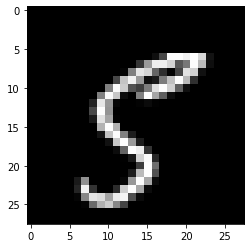

In [ ]:
# просмотр неугаданной картинки, правильной цифры и ошибочно предсказанной
errind=np.where(ytestOrg[range(ntest)]!=
               np.argmax(lotpredict,axis=2))[1]
instr='' #print(7,input(),7,sep='-')
nerr=0

while instr=='':
  instr=input('нажми ввод для следующей цифры, или введи любую букву для выхода\n')
  output.clear()
  plt.imshow(Image.fromarray(xtestOrg[errind[nerr]]).convert('RGB'))
  print('for image №',errind[nerr],'    true dig:', ytestOrg[errind[nerr]],'   predict dig',
        np.argmax(lotpredict[:,errind[nerr],:]))
  plt.show()
  nerr+=1

